In [25]:
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D
import numpy as np
import pandas as pd
np.random.seed(10)

In [26]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

In [27]:
import matplotlib.pyplot as plt
def plot_image_lables_prediction(images,lables,prediction,idx,num=10):
    fig = plt.gcf()
    fig.set_size_inches(12,14)
    if num>25 :num=25
    for i in range(0,num):
        ax = plt.subplot(5,5,1+i)
        ax.imshow(images[idx],cmap="binary")
        title = "label="+str(lables[idx])
        if len(prediction)>0:
            title +=",prediction="+str(prediction[idx])
        ax.set_title(title,fontsize=10)
        ax.set_xticks([]);ax.set_yticks([])

        idx+=1
    plt.show()

In [28]:
x_train4D=x_train.reshape(x_train.shape[0],28,28,1).astype("float32")
x_test4D=x_test.reshape(x_test.shape[0],28,28,1).astype("float32")

In [29]:
x_test4D_NL=x_test4D/255
x_train4D_NL=x_train4D/255

In [30]:
y_train_OH=np_utils.to_categorical(y_train)
y_test_OH=np_utils.to_categorical(y_test)

In [31]:
xx = Sequential()

In [32]:
xx=Sequential()

In [33]:
xx.add(Conv2D(filters=16,kernel_size=(5,5),padding='same',input_shape=(28,28,1),activation="relu"))

In [34]:
xx.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
xx.add(Conv2D(filters=36,kernel_size=(5,5),padding="same",activation='relu'))

In [36]:
xx.add(MaxPooling2D(pool_size=(2,2)))

In [37]:
xx.add(Dropout(0.25))

In [38]:
xx.add(Flatten())

In [39]:
xx.add(Dense(128,activation='relu'))

In [40]:
xx.add(Dropout(0.5))

In [41]:
xx.add(Dense(10,activation='softmax'))

In [42]:
print(xx.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_2 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               225920    
__________

In [43]:
xx.compile(loss="categorical_crossentropy",optimizer='adam',metrics=['accuracy'])

In [44]:
train_history=xx.fit(x=x_train4D_NL,y=y_train_OH,validation_split=0.2,epochs=10,batch_size=300,verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 1s - loss: 0.4898 - acc: 0.8472 - val_loss: 0.0954 - val_acc: 0.9725
Epoch 2/10
 - 1s - loss: 0.1398 - acc: 0.9585 - val_loss: 0.0628 - val_acc: 0.9809
Epoch 3/10
 - 1s - loss: 0.1022 - acc: 0.9691 - val_loss: 0.0510 - val_acc: 0.9836
Epoch 4/10
 - 1s - loss: 0.0830 - acc: 0.9760 - val_loss: 0.0456 - val_acc: 0.9862
Epoch 5/10
 - 1s - loss: 0.0709 - acc: 0.9780 - val_loss: 0.0400 - val_acc: 0.9877
Epoch 6/10
 - 1s - loss: 0.0630 - acc: 0.9815 - val_loss: 0.0394 - val_acc: 0.9883
Epoch 7/10
 - 1s - loss: 0.0555 - acc: 0.9829 - val_loss: 0.0448 - val_acc: 0.9864
Epoch 8/10
 - 1s - loss: 0.0513 - acc: 0.9838 - val_loss: 0.0336 - val_acc: 0.9898
Epoch 9/10
 - 1s - loss: 0.0447 - acc: 0.9862 - val_loss: 0.0333 - val_acc: 0.9901
Epoch 10/10
 - 1s - loss: 0.0426 - acc: 0.9868 - val_loss: 0.0343 - val_acc: 0.9897


In [45]:
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title("Train History")
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train','validation'],loc='upper left')
    plt.show()

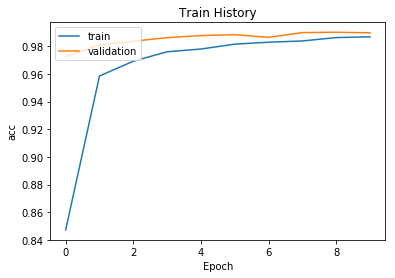

In [46]:
show_train_history(train_history,'acc','val_acc')

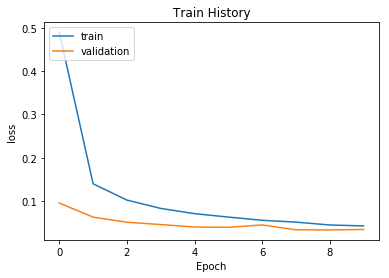

In [47]:
show_train_history(train_history,'loss','val_loss')

In [48]:
scroes = xx.evaluate(x_test4D_NL,y_test_OH)


10000/10000 [==============================] - 0s 33us/step


In [26]:
prediction = xx.predict_classes(x_test4D_NL)

10000/10000 [==============================] - 0s 44us/step


In [27]:
prediction

array([7, 2, 1, ..., 4, 5, 6])

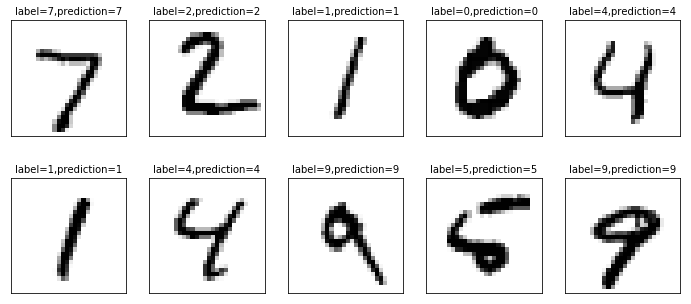

In [28]:
plot_image_lables_prediction(x_test,y_test,prediction=prediction,idx=0)

In [29]:
pd.crosstab(y_test,prediction,rownames=["lable"],colnames=["predict"])

predict,0,1,2,3,4,5,6,7,8,9
lable,,,,,,,,,,
0,977,0,0,0,0,0,1,0,1,1
1,0,1129,4,0,0,0,2,0,0,0
2,1,0,1028,0,0,0,0,2,1,0
3,0,0,2,1003,0,4,0,0,1,0
4,0,0,0,0,976,0,1,0,1,4
5,1,0,0,1,0,889,1,0,0,0
6,3,2,0,0,1,1,950,0,1,0
7,0,2,5,0,0,0,0,1018,1,2
8,2,0,3,0,0,0,0,0,965,4


In [30]:
df = pd.DataFrame({'lable':y_test,"prediction":prediction})

In [34]:
df[(df.lable==4)&(df.prediction==9)]

,lable,prediction
115,4,9
1242,4,9
2130,4,9
4860,4,9


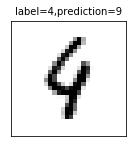

In [35]:
plot_image_lables_prediction(x_test,y_test,prediction,idx=115,num=1)